In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('train.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# checking for missing values
train_data.isnull().sum()

In [3]:
#choosing numeric data only
numeric_train = train_data.select_dtypes(include='number')
numeric_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


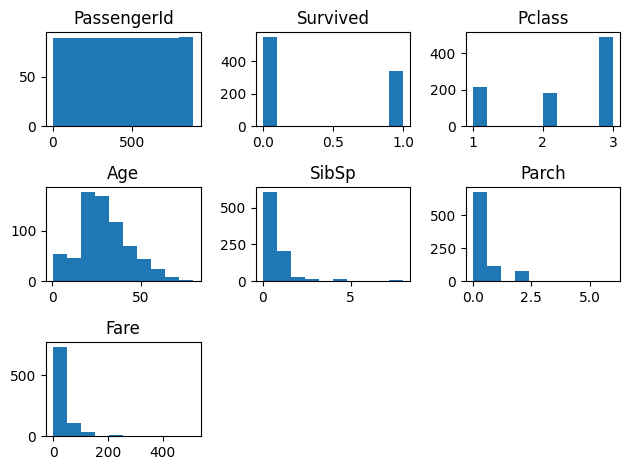

In [4]:
#checking dfor central tendency
plt.Figure(figsize=(10,10))
for i, col in enumerate(numeric_train.columns):
    plt.subplot(3, 3, i+1)
    plt.hist(train_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [5]:
#Handling missing data
#skewed and numeric
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
# for categorial
train_data['Cabin'] = train_data['Cabin'].fillna(train_data['Cabin'].mode()[0])
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

In [6]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

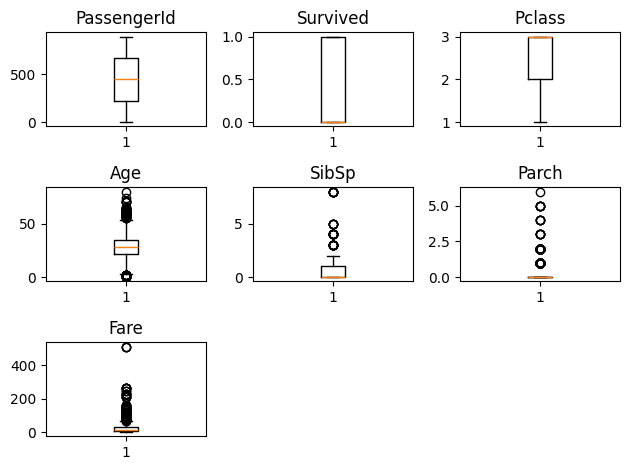

In [ ]:
#checking for outliers
plt.Figure(figsize=(20,20))
for i, col in enumerate(numeric_train.columns):
    plt.subplot(3,3,i+1)
    plt.boxplot(train_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [13]:
#Handling outliers
def removing_outliers(columns):
    for i in columns:
        lower_quantile = train_data[i].quantile(.25)
        upper_quantile = train_data[i].quantile(.75)

        IQR = upper_quantile-lower_quantile
        upper_boundary = upper_quantile+1.5*IQR
        lower_boundary = lower_quantile-1.5*IQR

        train_data[i] = np.where(train_data[i]>upper_boundary,upper_boundary,train_data[i])
        train_data[i] = np.where(train_data[i]<lower_boundary,lower_boundary,train_data[i])
removing_outliers(numeric_train)


<Figure size 640x480 with 0 Axes>

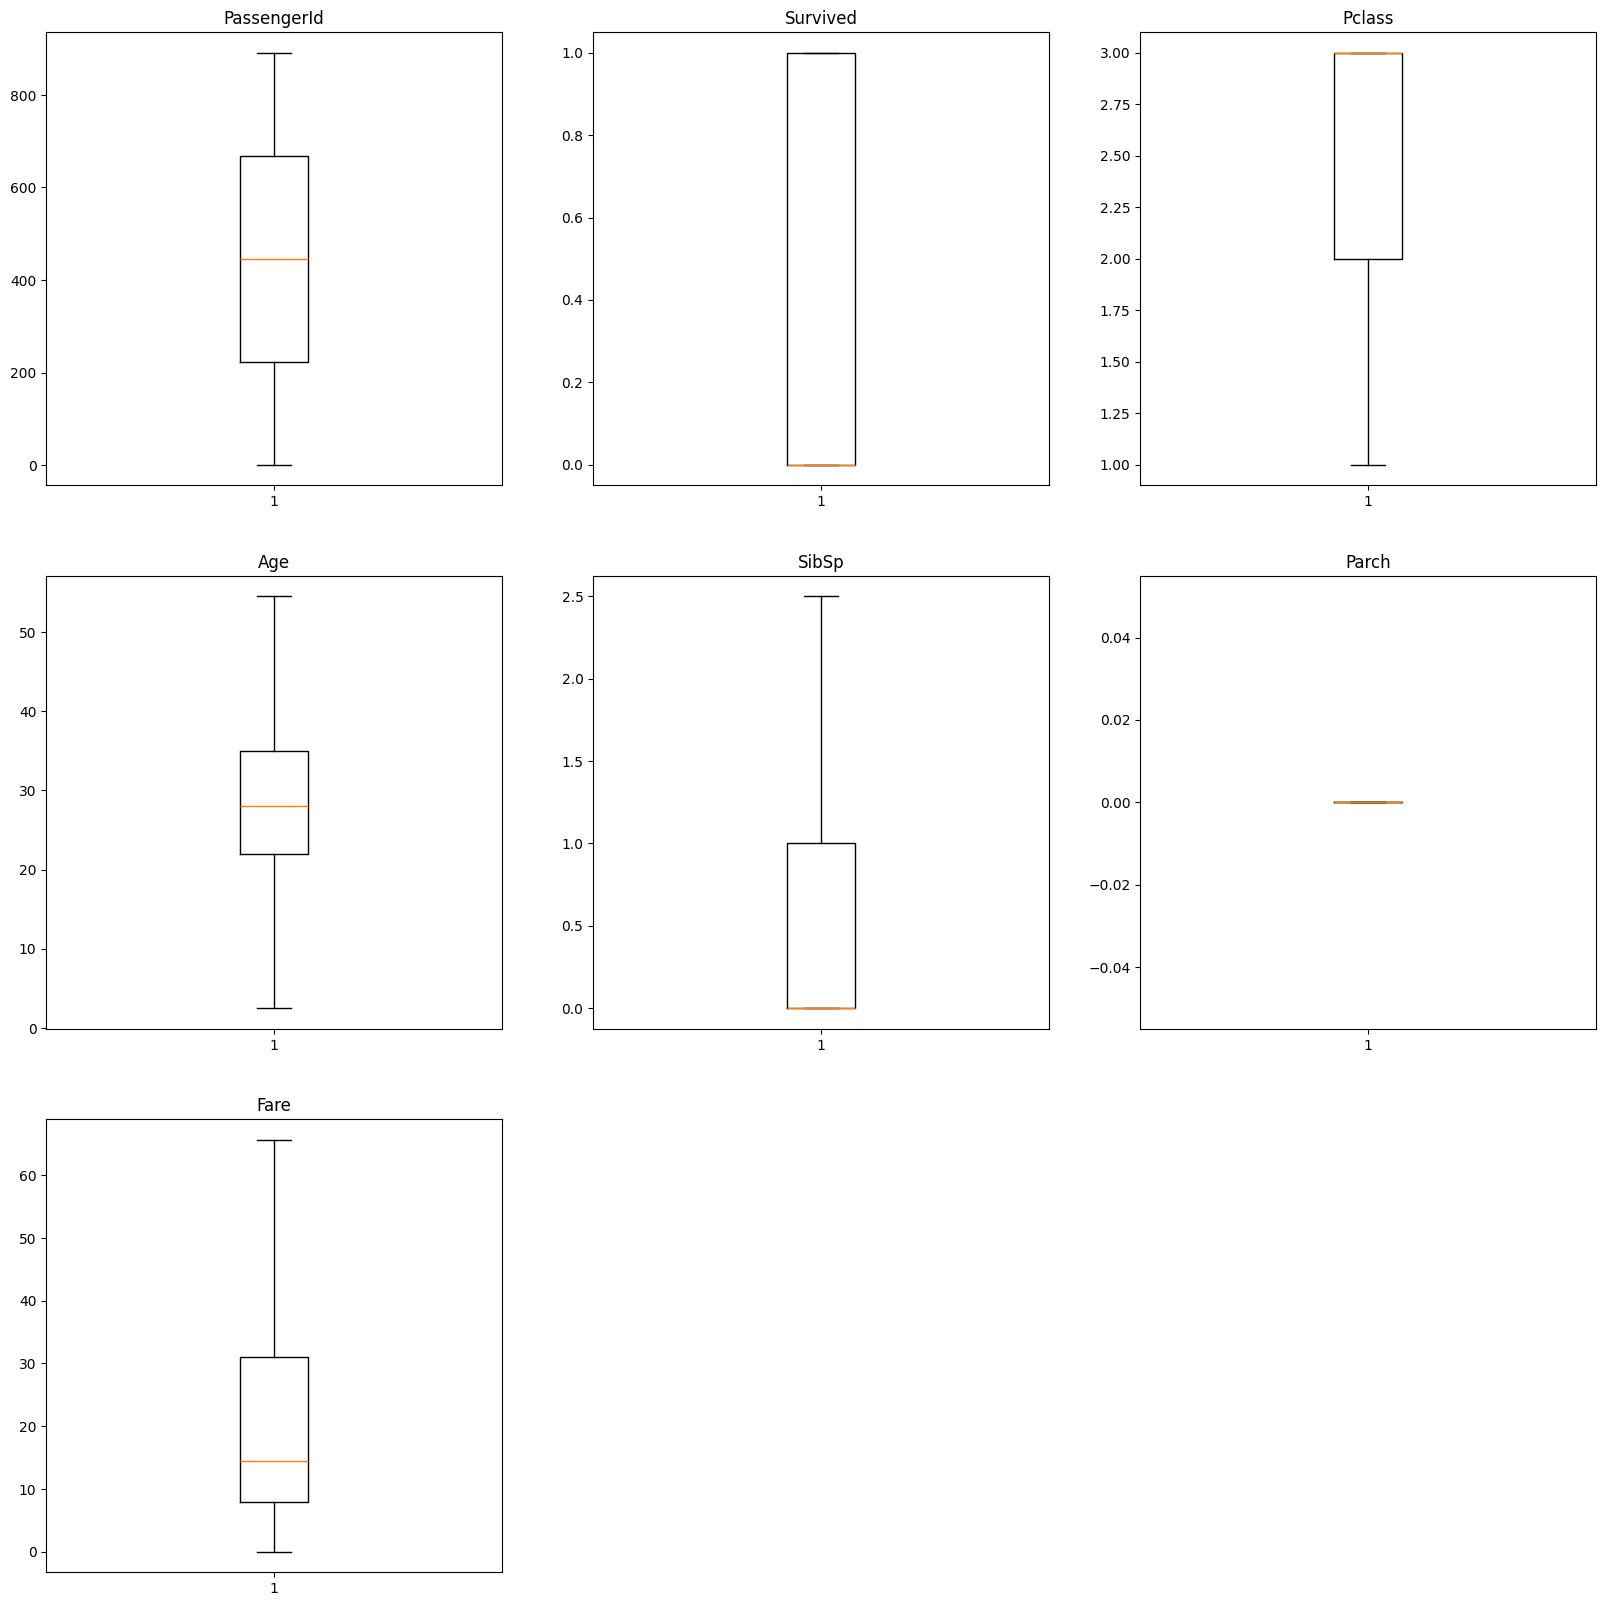

In [ ]:
def boxplotting(numeric_train):
    plt.figure(figsize=(20,20))
    for i, col in enumerate(numeric_train.columns):
        plt.subplot(3,3,i+1)
        plt.boxplot(train_data[col])
        plt.title(col)
plt.tight_layout()
plt.show()
boxplotting(numeric_train)